In [1]:
import pickle

from google.colab import files
uploaded = files.upload()

with open('newsgroups', 'rb') as f:
    newsgroup_data = pickle.load(f)

Saving newsgroups to newsgroups


In [2]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

nltk.download('stopwords')
stop_words = stopwords.words('english')

def preprocess(text):
    text = re.sub(r'\W+', ' ', text)       # Remove special chars
    text = text.lower()                    # Lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

cleaned_data = [preprocess(doc) for doc in newsgroup_data]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
from sklearn.decomposition import LatentDirichletAllocation, NMF

# Vectorisation
count_vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
count_data = count_vectorizer.fit_transform(cleaned_data)

tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')
tfidf_data = tfidf_vectorizer.fit_transform(cleaned_data)

# LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(count_data)

# NMF
nmf = NMF(n_components=10, random_state=42)
nmf.fit(tfidf_data)

NMF(n_components=10, random_state=42)

In [4]:
def display_topics(model, feature_names, no_top_words):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx+1}: ", [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])

print("LDA Topics:")
display_topics(lda, count_vectorizer.get_feature_names_out(), 10)

print("\nNMF Topics:")
display_topics(nmf, tfidf_vectorizer.get_feature_names_out(), 10)

LDA Topics:
Topic 1:  ['25', 'team', 'new', 'time', '10', 'gm', 'know', 'pick', 'hockey', 'edu']
Topic 2:  ['55', 'pit', 'chi', 'det', 'bos', 'tor', 'stl', 'van', 'la', 'nyi']
Topic 3:  ['game', 'year', 'team', 'good', 'games', 'play', 'season', 'got', '10', 'win']
Topic 4:  ['like', 'people', 'time', 'want', 'long', 'know', 'think', 'way', 'used', 'going']
Topic 5:  ['think', 'car', 'like', 'know', 'good', 'right', 'new', 'insurance', 'years', 'say']
Topic 6:  ['good', 'like', 'ground', 'know', 'say', 'better', 'year', 'really', 'people', 'think']
Topic 7:  ['like', 'know', 'think', 'vga', 'use', 'car', 'good', 'time', 'data', 'monitor']
Topic 8:  ['drive', 'disk', 'scsi', 'use', 'hard', 'card', 'drives', 'controller', 'problem', 'bios']
Topic 9:  ['edu', 'com', 'people', 'cs', 'gordon', 'banks', 'ca', 'soon', 'pitt', 'david']
Topic 10:  ['space', 'nasa', 'god', 'people', 'new', 'center', 'information', 'atheism', 'cancer', 'research']

NMF Topics:
Topic 1:  ['time', 'bike', 'good', '

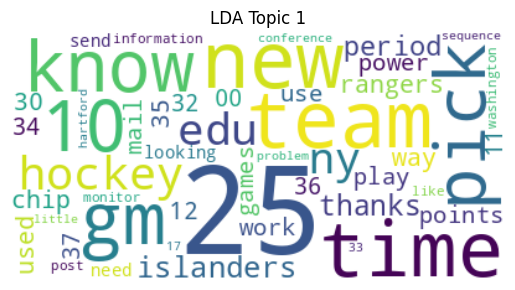

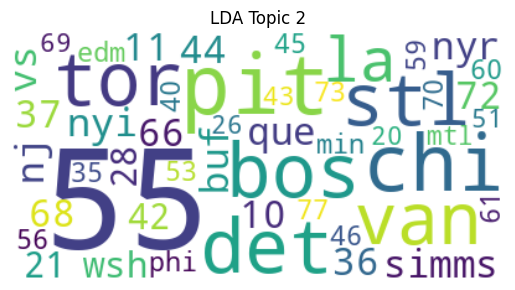

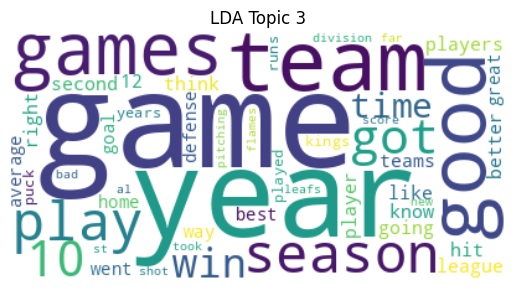

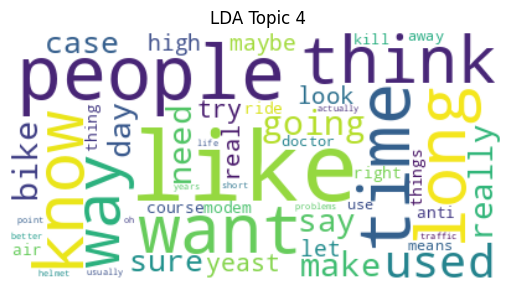

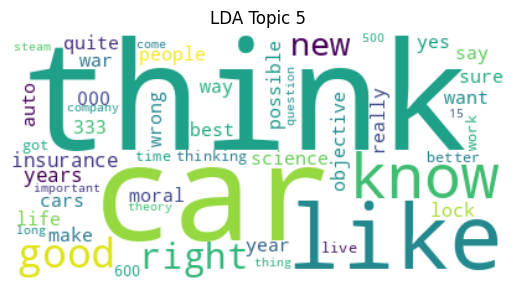

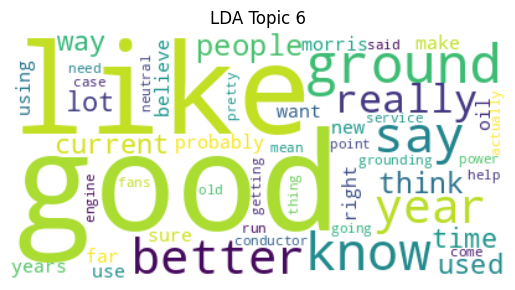

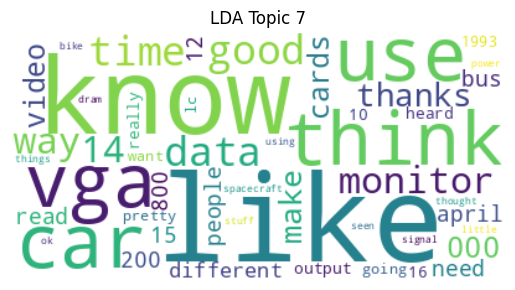

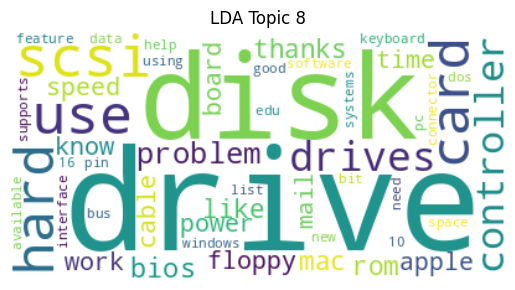

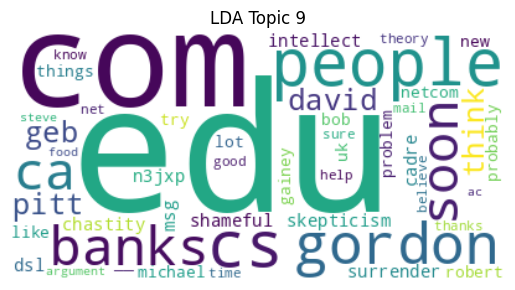

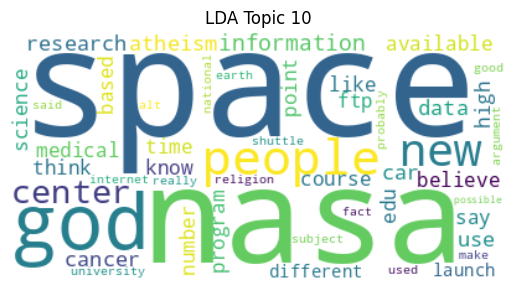

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pour LDA :
for idx, topic in enumerate(lda.components_):
    plt.figure()
    wordcloud = WordCloud(background_color='white').generate_from_frequencies({count_vectorizer.get_feature_names_out()[i]: topic[i] for i in topic.argsort()[:-50:-1]})
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"LDA Topic {idx+1}")
    plt.show()

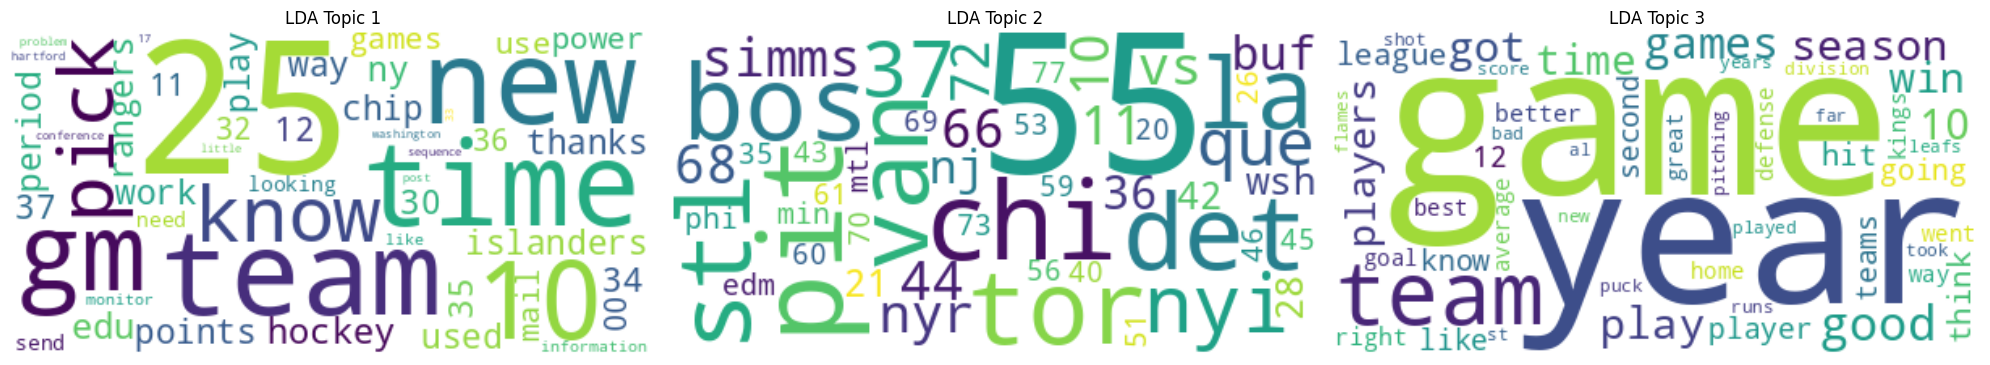

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Créer des sous-plots en 1 ligne (1 row, 3 columns pour 3 topics, par exemple)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # Ajuste le 3 à ton nombre de topics

for idx, topic in enumerate(lda.components_[:3]):  # Par exemple, les 3 premiers topics
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(
        {count_vectorizer.get_feature_names_out()[i]: topic[i] for i in topic.argsort()[:-50:-1]}
    )
    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].axis('off')
    axes[idx].set_title(f"LDA Topic {idx+1}")

plt.tight_layout()
plt.show()
